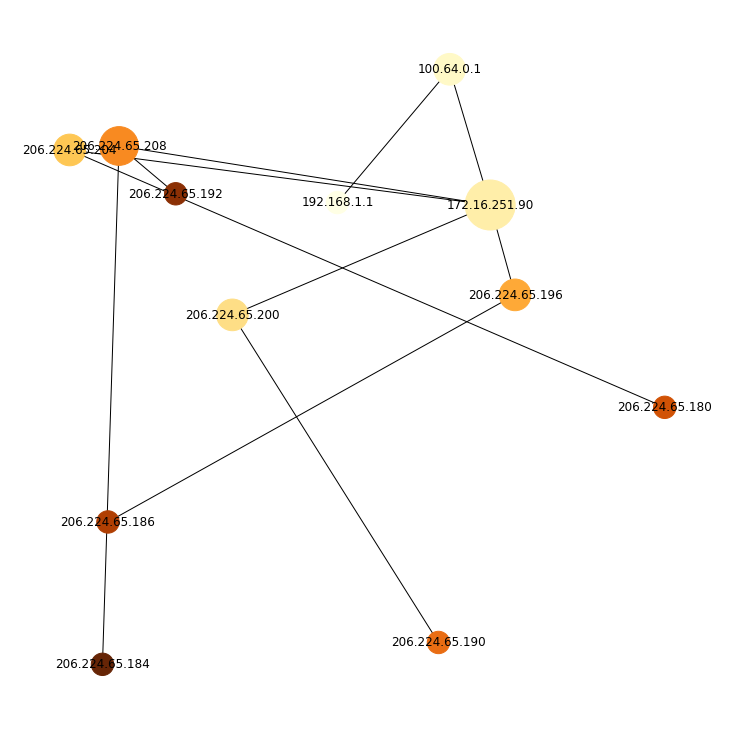

In [16]:
import networkx as nx
import csv
import os
import matplotlib.pyplot as plt

G = nx.Graph()
g = {}

base = "/root/idp-castellotti-data/new-traceroutes/azure/"
for file in os.listdir(base):
    filename = os.fsdecode(file)
    if "starlink" in filename and "ICMP" in filename:
        with open(base + filename, "r") as csvfile:
            d = list(csv.reader(csvfile))
            for r in range(len(d) - 25):
                ip1 = d[r][2]
                ip2 = d[r + 1][2]
                effe = ["*", "ip"]
                if ip1 not in effe and ip2 not in effe:
                    if ip1 not in g:
                        g[ip1] = []
                    if ip2 not in g[ip1]:
                        g[ip1].append(ip2)

for k, v in g.items():
    G.add_node(k)
    for i in v:
        G.add_edge(k, i)

list_degree=list(G.degree()) 
nodes , degree = map(list, zip(*list_degree)) 
plt.figure(figsize=(10, 10))
nx.draw_random(
    G,
    node_color=range(len(list_degree)),
    nodelist=nodes,
    cmap=plt.cm.YlOrBr,
    node_size=[(v * 500) + 1 for v in degree],
    with_labels=True,
)
